### 3 Ways of creating State Schema
- **TypedDict:** *from typing_extensions import TypedDict*
- **Dataclass:** *from dataclasses import dataclass*
- **Pydantic** *from pydantic import BaseModel*

#### TypedDict
- Using TypedDict, will be not having data validation at runtime
- We need to provide the key-value pair when invoking the graph
- Also, providing all the variable values each time or while invoking is not mandatory

In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal['cricket','badminton']

In [4]:
def play_game(state:TypedDictState):
    print("play game node called")
    return {"name":state['name']}

def cricket(state:TypedDictState):
    print('cricket node is called')
    return {'game':'cricket'}

def badminton(state:TypedDictState):
    print('badminton node is called')
    return {'game':'badminton'}

import random
def decide_game(state:TypedDictState)->Literal['cricket','badminton']:
    if random.random()<0.5:
        return 'cricket'
    else:
        return 'badminton'

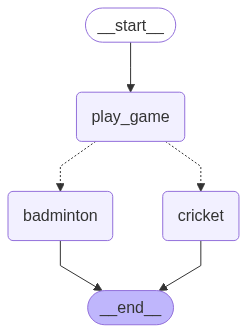

In [5]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image, display

graph=StateGraph(TypedDictState)
graph.add_node('play_game',play_game)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)
graph.add_edge(START,'play_game')
graph.add_conditional_edges('play_game',decide_game)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
graph_builder.invoke({'name':'srishti'})

play game node called
badminton node is called


{'name': 'srishti', 'game': 'badminton'}

so here we can see that name is of str type but still we are not getting any error when passed int in name

In [8]:
graph_builder.invoke({'name':7392})

play game node called
cricket node is called


{'name': 7392, 'game': 'cricket'}

#### Dataclass
- We apply a decorator of dataclass as @dataclass
- Similar as TypedDict, this also is not enforced at runtime means not do data validation of type
- Way of accessing the variable from state object and passing the value while invoking the graph is different by TypedDict
- While invoking we need to provide all the variable values
- Python's dataclasses provide another way to define structured data
- Dataclasses offer a concise syntax for creating classes that are primarily used to store data

In [9]:
from dataclasses import dataclass
from typing import Literal

@dataclass
class DataClassState:
    name:str
    game:Literal['cricket','badminton']

In [10]:
def play_game(state:DataClassState):
    print("play game node called")
    return {"name":state.name}  # access way changes from TypedDict

def cricket(state:DataClassState):
    print('cricket node is called')
    return {'game':'cricket'}

def badminton(state:DataClassState):
    print('badminton node is called')
    return {'game':'badminton'}

import random
def decide_game(state:DataClassState)->Literal['cricket','badminton']:
    if random.random()<0.5:
        return 'cricket'
    else:
        return 'badminton'

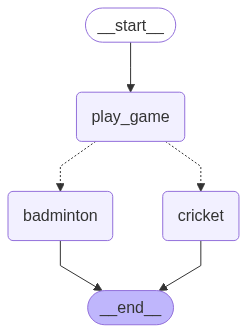

In [11]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image, display

graph=StateGraph(DataClassState)
graph.add_node('play_game',play_game)
graph.add_node('cricket',cricket)
graph.add_node('badminton',badminton)
graph.add_edge(START,'play_game')
graph.add_conditional_edges('play_game',decide_game)
graph.add_edge('cricket',END)
graph.add_edge('badminton',END)

graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
# graph_builder.invoke(DataClassState(name='srishti'))
graph_builder.invoke(DataClassState(name='srishti',game='badminton'))

play game node called
badminton node is called


{'name': 'srishti', 'game': 'badminton'}

so here also same as TypedDict, it will not validate the datatype and not give error. But, if we not provide all the variable present in state class while invoking, it will give error

In [13]:
graph_builder.invoke(DataClassState(name=3792,game='cricket'))

play game node called
badminton node is called


{'name': 3792, 'game': 'badminton'}

#### Pydantic - Data Validation Library
- Pydantic supports validation of many standard library types including dataclass and TypedDict
- During runtime, it will check the datatype and do data validation, throw error if validation fails
- Pydantic's core validation logic is written in Rust, as a result it become fastest data validation library for python
- We can also create complex nested models using pydantic

In [11]:
from pydantic import BaseModel, Field
from typing import Optional, List

class PydanticState(BaseModel):
    name:str
    # age: Optional[int]=20 # optional with default value 
    # hobbies: List[str]
    # price:float= Field(gt=0,le=1000) # greater than 0, less than or equal to 1000

In [21]:
def chatbot(state:PydanticState):
    print('chatbot node is called')
    return {'name':"state['name']"}

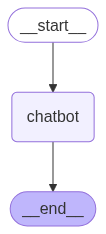

In [22]:
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image

graph=StateGraph(PydanticState)
graph.add_node('chatbot',chatbot)
graph.add_edge(START,'chatbot')
graph.add_edge('chatbot',END)

graph_builder=graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [23]:
graph_builder.invoke({'name':"srishti"})

chatbot node is called


{'name': "state['name']"}

as data validation is applied so below line throws ValidationError as name is of str type

In [ ]:
graph_builder.invoke({'name':389})